In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import curve_fit
import matplotlib.animation as animation
from matplotlib import style
import ipyvolume as ipv

## Sensor Data Fitting and Calibration

            3            2
-2.859e-06 x + 0.003807 x - 1.676 x + 277.1
[-2.85862174e-06  3.80655130e-03 -1.67574813e+00  2.77061344e+02]


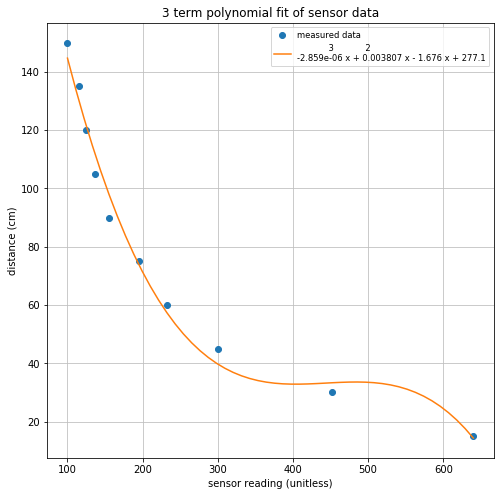

In [2]:
# calibration
def plot_calibration(x,y):
    """run a polyfit on sensor data, and generate a plot of
    the original date alongside the fit. Blocking operation.
    x: sensor measurements as np array
    y: decided distance increments
    """
    z,f = calibrate_curve(x, y)
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = f(x_new)

    print(f)
    print(z)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'o', label="measured data")
    ax.plot(x_new, y_new, label=f)
    #ax.set_xlim([x[0]-1, y[-1] + 1])
    ax.set_title("3 term polynomial fit of sensor data")
    plt.legend(fontsize="small")
    ax.set_xlabel("sensor reading (unitless)")
    ax.set_ylabel("distance (cm)")
    ax.grid(True, linestyle='-', color='0.75')

    plt.show()
    
def calibrate_curve(x, y):
    """run a polyfit on sensor data
    x: sensor measurements as np array
    y: decided distance increments
    returns: fit and coefficients of fit
    """
    z = np.polyfit(x, y, 3)
    f = np.poly1d(z)
    return z, f

def sensor_2_distance(reading):
    """convert from reading to distance measured in cm
    reading: unscaled value from IR sensor
    returns: converted distance in cm"""
    readings = np.asarray([640, 452, 300, 232, 195, 155, 137, 125, 115, 100])
    distances = np.asarray([15, 30, 45, 60, 75, 90, 105, 120, 135, 150])

    coeffs, fit_func = calibrate_curve(readings, distances)

    return fit_func(reading)

readings = np.asarray([640, 452, 300, 232, 195, 155, 137, 125, 115, 100])
distances = np.asarray([15, 30, 45, 60, 75, 90, 105, 120, 135, 150])

plot_calibration(readings, distances)

## Error calculation

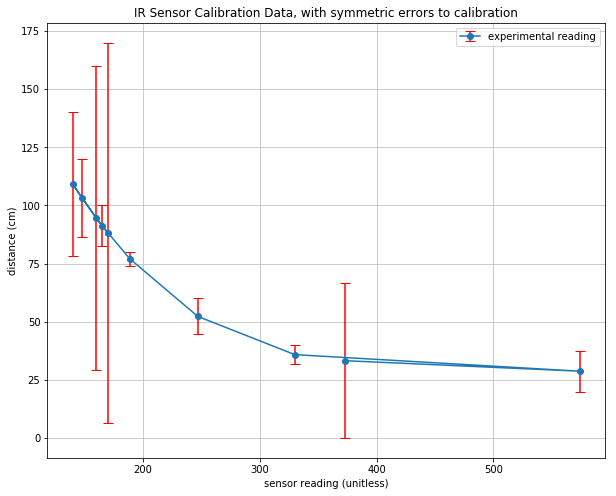

In [3]:
df_err = pd.read_csv("errors.csv")

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example error bar values that vary with x-position
error = abs(df_err['scaled distance'] - df_err['measured dist'])

fig = plt.figure(figsize=(10, 8))
ax0 = fig.add_subplot(111)
ax0.errorbar(df_err['distance'], df_err['scaled distance'], yerr=error, fmt='-o', ecolor='r', capsize=5)
ax0.set_title('IR Sensor Calibration Data, with symmetric errors to calibration')
ax0.set_xlabel("sensor reading (unitless)")
ax0.set_ylabel("distance (cm)")
ax0.legend(['experimental reading'])
ax0.grid(True, linestyle='-', color='0.75')


## Dataframe reshaping and Polar Plotting

In [4]:
df = pd.read_csv("big_letter_1deg_step.csv")
df_2d = pd.read_csv("big_letter_1deg_step_2D.csv")

In [5]:
# drop the extra index column
df = df.drop(['Unnamed: 0'], axis=1)
df_2d = df_2d.drop(['Unnamed: 0'], axis=1)

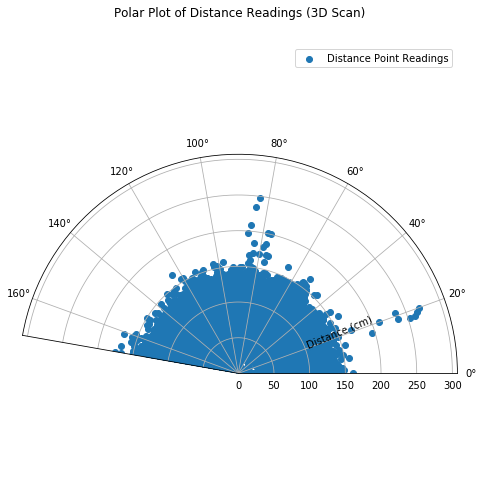

In [6]:
sel = df.loc[df['r'] > 0].loc[df['r'] < 60]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
c = ax.scatter(df['theta']*(math.pi/180), df['r'])
ax.set_title("Polar Plot of Distance Readings (3D Scan)")
ax.set_thetamin(0)
ax.set_thetamax(170)
ax.legend(['Distance Point Readings'])
label_position=ax.get_rlabel_position()
ax.text(np.radians(label_position),ax.get_rmax()/2.,'Distance (cm)',
        rotation=label_position,ha='center',va='center')
plt.show()

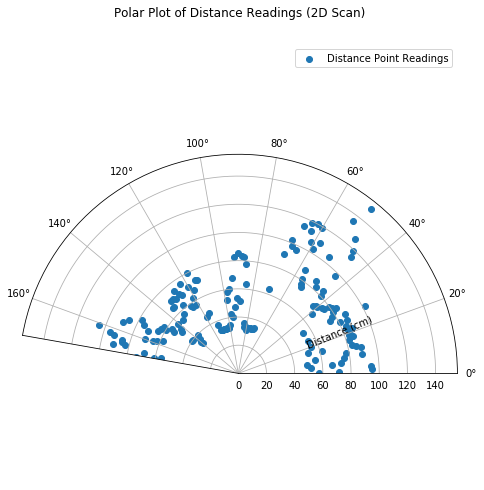

In [7]:
sel_2d = df_2d.loc[df_2d['r'] > 0].loc[df_2d['r'] < 60]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
c = ax.scatter(df_2d['theta']*(math.pi/180), df_2d['r'])
ax.set_title("Polar Plot of Distance Readings (2D Scan)")
ax.set_thetamin(0)
ax.set_thetamax(170)
ax.legend(['Distance Point Readings'])
label_position=ax.get_rlabel_position()
ax.text(np.radians(label_position),ax.get_rmax()/2.,'Distance (cm)',
        rotation=label_position,ha='center',va='center')
plt.show()

## Cartesian Coordinate System Plotting

In [8]:
sel = df.loc[df['r'] > 30].loc[df['r'] < 50]
ipv.quickscatter(sel['x'], sel['z'], sel['y'], marker="sphere")

In [9]:
new = sel.loc[sel['z'] > -20].loc[sel['z'] < 20].loc[sel['y'] > 30].loc[sel['y'] < 60]
ipv.quickscatter(new['x'].values, new['z'].values, new['y'].values, marker="sphere")

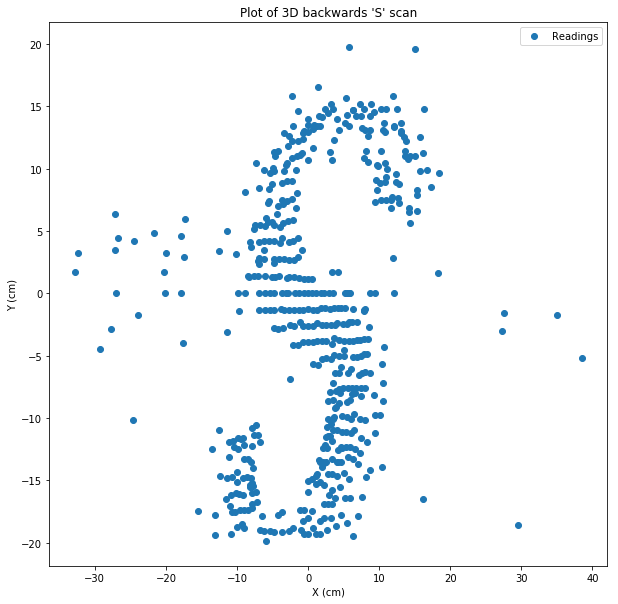

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(-new['x'],new['z'],'o')
ax.set_title("Plot of 3D backwards 'S' scan")
ax.set_xlabel("X (cm)")
ax.set_ylabel("Y (cm)")
ax.legend(['Readings'])